In [3]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muthuj7/weather-dataset")

print("Path to dataset files:", path)

c:\Users\ltron\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\ltron\.cache\kagglehub\datasets\muthuj7\weather-dataset\versions\1


In [5]:

data = pd.read_csv("weatherHistory.csv")
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [6]:
data["Precip Type"].unique(), data["Summary"].unique(), data["Daily Summary"].unique()

(array(['rain', 'snow', nan], dtype=object),
 array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy', 'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy', 'Breezy and Overcast', 'Humid and Mostly Cloudy', 'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast', 'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy', 'Dry and Partly Cloudy', 'Windy and Mostly Cloudy', 'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy', 'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry', 'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object),
 array(['Partly cloudy throughout the day.', 'Mostly cloudy throughout the day.', 'Foggy in the evening.', 'Foggy overnight and breezy in the morning.', 'Overcast throughout the day.', 'Partly cloudy until night.', 'Mostly cloudy until night.', 'Foggy starting overnight continuing until morning.', 'Foggy in the morning.', 'Partly cloudy until evening.', 'Partly cloudy starting in the morning.', 'Mostly cloudy s

# Preprosesamiento

In [7]:
df_encoded = data.copy()

- Conversion de variables categoricas

Codificamos la precipitacion en "Llovio" o "Nevo"

In [8]:
df_encoded = pd.get_dummies(data, columns=['Precip Type'], prefix='Precip')

In [9]:
df_encoded[["Precip_rain", "Precip_snow"]].sample(10)

,Precip_rain,Precip_snow
80438,True,False
67689,True,False
37553,True,False
70567,True,False
24885,True,False
25951,True,False
45310,True,False
59421,True,False
69591,True,False
79566,True,False


Codificamos la categoria "Summary" puntuado segun nubosidad, intensidad de viento, humedad y precipitacion

In [10]:
cloudy_map = {
    'Clear': 0,
    'Partly Cloudy': 1,
    'Mostly Cloudy': 2,
    'Overcast': 3,
    'Foggy': 4
}

wind_map = {
    'None': 0,
    'Breezy': 1,
    'Windy': 2,
    'Dangerously Windy': 3
}
humidity_map = {
    'None': 0,
    'Dry': 1,
    'Humid': 2
}

precip_map = {
    'None': 0,
    'Drizzle': 1,
    'Light Rain': 2,
    'Rain': 3
}

def extract_features(summary):
    cloud = None
    wind = 'None'
    humidity = 'None'
    precip = 'None'
  
    for cloud_type in ['Clear', 'Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy']:
        if cloud_type in summary:
            cloud = cloud_type
            break
    
    # Buscar componente de viento
    if 'Dangerously Windy' in summary:
        wind = 'Dangerously Windy'
    elif 'Windy' in summary:
        wind = 'Windy'
    elif 'Breezy' in summary:
        wind = 'Breezy'
    
    # Buscar componente de humedad
    if 'Humid' in summary:
        humidity = 'Humid'
    elif 'Dry' in summary:
        humidity = 'Dry'
    
    # Buscar componente de precipitación
    if 'Rain' in summary and 'Light' not in summary:
        precip = 'Rain'
    elif 'Light Rain' in summary:
        precip = 'Light Rain'
    elif 'Drizzle' in summary:
        precip = 'Drizzle'
    
    return cloud, wind, humidity, precip

# Aplicar la función a cada resumen
df_encoded['cloud_value_hour'] = data['Summary'].apply(lambda x: cloudy_map.get(extract_features(x)[0], 0))
df_encoded['wind_value_hour'] = data['Summary'].apply(lambda x: wind_map.get(extract_features(x)[1], 0))
df_encoded['humidity_value_hour'] = data['Summary'].apply(lambda x: humidity_map.get(extract_features(x)[2], 0))
df_encoded['precip_value_hour'] = data['Summary'].apply(lambda x: precip_map.get(extract_features(x)[3], 0))

In [11]:
df_encoded[["Summary", "cloud_value_hour", "wind_value_hour", "humidity_value_hour", "precip_value_hour"]].sample(10)

,Summary,cloud_value_hour,wind_value_hour,humidity_value_hour,precip_value_hour
36490,Mostly Cloudy,2,0,0,0
28271,Mostly Cloudy,2,0,0,0
22068,Mostly Cloudy,2,0,0,0
95164,Drizzle,0,0,0,1
47807,Partly Cloudy,1,0,0,0
55019,Overcast,3,0,0,0
92185,Mostly Cloudy,2,0,0,0
32673,Partly Cloudy,1,0,0,0
30910,Mostly Cloudy,2,0,0,0
60542,Partly Cloudy,1,0,0,0


Convertimos la columna de fecha en la etiqueta considerando solo las horas del dia

In [12]:
y = pd.DataFrame()

In [13]:
y['Hour'] = df_encoded['Formatted Date'].str.split(' ').str[1].str.split(':').str[0].astype(int)
y.sample(5)

,Hour
998,14
87327,18
85672,20
10615,7
9817,1


Modificamos las etiquetas para considerar un grupo de horas como horarios (madrugada, dia, tarde y noche)

In [62]:
def categorize_hour1(hour):
    if 0 <= hour <= 5:
        return 0
    elif 6 <= hour <= 11:
        return 1
    elif 12 <= hour <= 17:
        return 2
    elif 18 <= hour <= 23:
        return 3
    
def categorize_hour2(hour):
    if 20 <= hour or hour <= 3:
        return 0
    elif 4 <= hour <= 11:
        return 1
    elif 12 <= hour <= 19:
        return 2

y['Schedule1'] = y['Hour'].apply(categorize_hour1)
y['Schedule2'] = y['Hour'].apply(categorize_hour2)
y.sample(5)

,Hour,Schedule1,Schedule2
12781,13,2,2
25610,2,0,0
4155,3,0,0
58404,13,2,2
49270,22,3,0


Eliminamos las columnas irrelevantes

In [15]:
df_encoded.drop(columns=["Formatted Date", "Summary", "Daily Summary"], inplace=True)

In [16]:
df_encoded.sample(10)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Precip_rain,Precip_snow,cloud_value_hour,wind_value_hour,humidity_value_hour,precip_value_hour
33742,5.555556,1.300000,0.69,24.4720,311.0,15.1501,0.0,1011.15,True,False,2,0,0,0
21803,26.005556,26.005556,0.55,23.2645,299.0,11.4471,0.0,1009.40,True,False,1,0,0,0
16807,6.111111,6.111111,0.87,0.1449,280.0,9.6117,0.0,1023.95,True,False,2,0,0,0
73812,23.794444,23.794444,0.54,9.1931,29.0,16.1000,0.0,1006.12,True,False,1,0,0,0
17580,17.822222,17.822222,0.59,15.4238,181.0,11.2056,0.0,1003.68,True,False,2,0,0,0
54630,-2.455556,-5.922222,0.77,8.9838,120.0,9.6761,0.0,1027.91,False,True,1,0,0,0
2996,-0.022222,-3.183333,0.92,9.4829,327.0,2.9785,0.0,1037.15,False,True,4,0,0,0
80258,19.577778,19.577778,0.92,4.0733,18.0,12.0428,0.0,1015.73,True,False,1,0,0,0
18016,19.005556,19.005556,0.33,17.2270,21.0,9.9820,0.0,1020.20,True,False,1,0,0,0
25138,18.738889,18.738889,0.62,9.7244,200.0,9.9820,0.0,1012.12,True,False,2,0,0,0


Separamos un 10% de los datos para validacion

In [43]:
X_train, X_test = train_test_split(df_encoded, test_size=0.1, random_state=42)
Y_train, Y_test = train_test_split(y, test_size=0.1, random_state=42)

In [44]:
X_train.head(1)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Precip_rain,Precip_snow,cloud_value_hour,wind_value_hour,humidity_value_hour,precip_value_hour
88408,23.911111,23.911111,0.69,9.6439,319.0,10.2557,0.0,1014.36,True,False,2,0,0,0


In [45]:
Y_train.head(1)

,Hour,Schedule1,Schedule2
88408,19,3,2


In [46]:
data["Formatted Date"][88408]

'2016-08-01 19:00:00.000 +0200'

# K-Means

Aplicamos K-Means para Aprendizaje Semi-Supervisado

In [47]:
k = 80
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

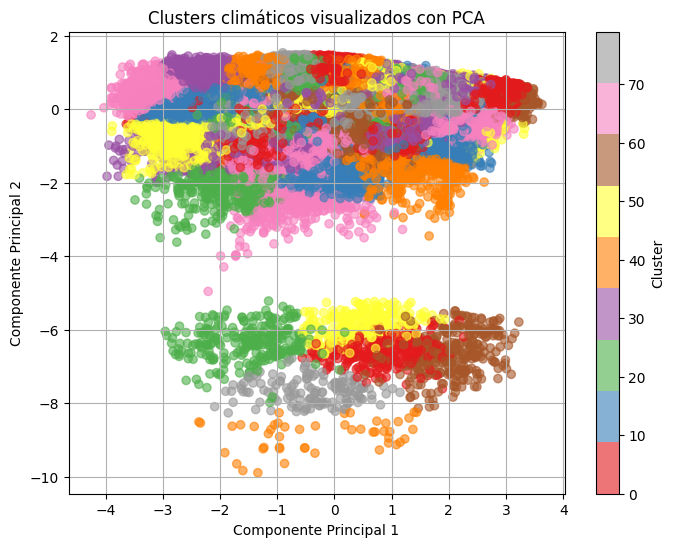

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Variables seleccionadas
features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
X = data[features].dropna()

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=80, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# PCA para reducción a 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Set1', alpha=0.6)
plt.title("Clusters climáticos visualizados con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

In [48]:
idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train.values[idxs]

In [49]:
pd.DataFrame(X_representative_digits)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,17.166667,17.166667,0.87,7.7119,185.0,9.982,0.0,1014.66,True,False,1,0,0,0
1,12.777778,12.777778,0.72,16.0195,110.0,9.982,0.0,0.0,True,False,0,0,0,0
2,0.538889,-0.95,0.8,4.9749,71.0,6.2307,0.0,1029.14,True,False,3,0,0,0
3,10.0,9.811111,0.86,4.8622,335.0,11.27,0.0,1019.19,True,False,3,0,0,0
4,12.705556,12.705556,0.73,25.7761,159.0,10.3684,0.0,1005.75,True,False,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,7.222222,5.088889,0.93,11.27,10.0,4.025,0.0,0.0,True,False,3,0,0,0
76,14.888889,14.888889,0.62,8.9999,307.0,11.3988,0.0,1014.67,True,False,2,0,0,0
77,24.894444,24.894444,0.65,8.855,135.0,10.8192,0.0,1013.56,True,False,1,0,0,0
78,27.85,28.283333,0.5,10.9319,198.0,11.3988,0.0,1013.15,True,False,1,0,0,0


In [51]:
y1_representative_digits = Y_train["Hour"].values[idxs]
y2_representative_digits = Y_train["Schedule1"].values[idxs]
y3_representative_digits = Y_train["Schedule2"].values[idxs]


In [58]:
sorter1 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
sorter1.fit(X_representative_digits, y1_representative_digits)
sorter1.score(X_test, Y_test["Hour"])

c:\Users\ltron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ltron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.06209827907941116

In [59]:
sorter2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
sorter2.fit(X_representative_digits, y2_representative_digits)
sorter2.score(X_test, Y_test["Schedule1"])

c:\Users\ltron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ltron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.3865851130002073

In [63]:
sorter3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
sorter3.fit(X_representative_digits, y3_representative_digits)
sorter3.score(X_test, Y_test["Schedule2"])

c:\Users\ltron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ltron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.40576404727348125

In [64]:
y1_train_propagated = np.empty(len(X_train))
for i in range(k):
  y1_train_propagated[kmeans.labels_==i] = y1_representative_digits[i]

In [65]:
y2_train_propagated = np.empty(len(X_train))
for i in range(k):
  y2_train_propagated[kmeans.labels_==i] = y2_representative_digits[i]

In [66]:
y3_train_propagated = np.empty(len(X_train))
for i in range(k):
  y3_train_propagated[kmeans.labels_==i] = y3_representative_digits[i]

In [67]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg3.fit(X_train[:1000], y1_train_propagated[:1000])
log_reg3.score(X_test, Y_test["Hour"])

c:\Users\ltron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.05307899647522289

In [68]:
log_reg3.fit(X_train[:1000], y2_train_propagated[:1000])
log_reg3.score(X_test, Y_test["Schedule1"])

c:\Users\ltron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.30064275347294217

In [69]:
log_reg3.fit(X_train[:1000], y3_train_propagated[:1000])
log_reg3.score(X_test, Y_test["Schedule2"])

c:\Users\ltron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.3835786854654779

# Aprendizaje Activo

In [71]:
probas = log_reg3.predict_proba(X_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:10]]


array([0.33646283, 0.33733282, 0.33735838, 0.33812697, 0.33830067, 0.3400031 , 0.34163259, 0.34271932, 0.34431579, 0.34450587])

In [72]:
X_lowest = X_train.values[:1000][sorted_ixs[:k]]

In [73]:
y_lowest = Y_train["Schedule2"].values[:1000][sorted_ixs[:k]]
y_lowest

array([0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1], dtype=int64)

In [74]:
y_train2 = y3_train_propagated[:1000].copy()
y_train2[sorted_ixs[:k]] = y_lowest

In [75]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, Y_test["Schedule2"])

c:\Users\ltron\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: total: 3.92 s
Wall time: 4.05 s


0.38668878291519804